In [1]:
#We pull the data FRED API 
#!pip install fredapi

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')
pd.set_option('max_columns',500)

color_palette = plt.rcParams["axes.prop_cycle"].by_key()['color'] 
#Change the colors in plots

from fredapi import Fred

#We need to pull the data directly in pandas and not via a CSV

fred_key = '5532075d622959c13f016debdcfcc3c1'

## <font color = 'BLUE'> 1. CREATE THE FRED OBJECT </FONT>

In [3]:
fred = Fred(api_key = fred_key)

In [4]:
fred

## <font color = 'BLUE'> 2. SEARCH FRED FOR ECONOMIC DATA </FONT>

In [5]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [6]:
sp_search.shape

(1000, 15)

In [7]:
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-04-17   2023-04-17   
CSUSHPINSA          CSUSHPINSA     2023-04-17   2023-04-17   
SP500                    SP500     2023-04-17   2023-04-17   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-04-17   2023-04-17   
CSUSHPISA            CSUSHPISA     2023-04-17   2023-04-17   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
SP500                                                     S&P 500   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-04-14  Daily, Close   
CSUSHPINSA            1987-01-01      2023-01-01       Monthly   
SP500                 2013-04-15      2023-04-14  Daily, Close   
BAMLH0A0HYM2EY        1996-12-31      2023-04-14  Daily, Close   
CSUSHPISA             1987-01-01      2023-01-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
SP500                        D               Index               Index   
BAMLH0A0HYM2EY               D             Percent                   %   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-04-17 08:54:02-05:00         95   
CSUSHPINSA      2023-03-30 10:39:01-05:00         91   
SP500           2023-04-14 19:10:49-05:00         84   
BAMLH0A0HYM2EY  2023-04-17 08:54:06-05:00         83   
CSUSHPISA       2023-03-30 10:39:01-05:00         81   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
SP500           The observations for the S&P 500 represent the...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
CSUSHPISA       For more information regarding the index, plea...

## <font color = 'BLUE'> 3. PULL RAW DATA AND PLOT</FONT>

In [8]:
#Lets pull in data for series SP500

In [9]:
sp500 = fred.get_series('SP500')

<AxesSubplot:title={'center':'S&P 500'}>

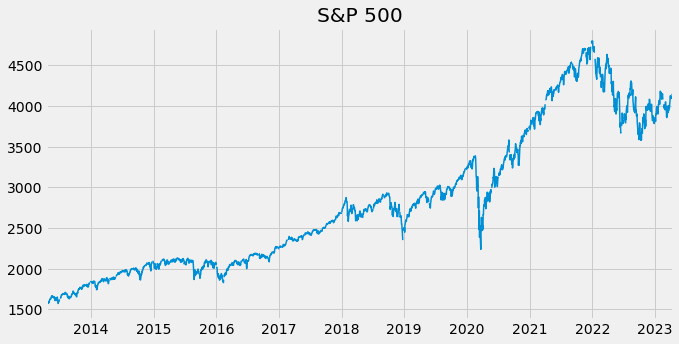

In [10]:
sp500.plot(figsize = (10,5), title= 'S&P 500', lw = 1.5)

## <font color = 'BLUE'> 4. PULL and JOIN MULTIPLE DATA SERIES</FONT>

In [11]:
unemp_results = fred.search('unemployment')

In [12]:
unemp_results

id realtime_start realtime_end  \
series id                                                                  
UNRATE                                UNRATE     2023-04-17   2023-04-17   
UNRATENSA                          UNRATENSA     2023-04-17   2023-04-17   
NROU                                    NROU     2023-04-17   2023-04-17   
CCSA                                    CCSA     2023-04-17   2023-04-17   
UNEMPLOY                            UNEMPLOY     2023-04-17   2023-04-17   
...                                      ...            ...          ...   
LAUCN180030000000003A  LAUCN180030000000003A     2023-04-17   2023-04-17   
LAUCN340070000000003A  LAUCN340070000000003A     2023-04-17   2023-04-17   
LAUCN060410000000003A  LAUCN060410000000003A     2023-04-17   2023-04-17   
CPIAUCSL                            CPIAUCSL     2023-04-17   2023-04-17   
LAUCN340030000000003A  LAUCN340030000000003A     2023-04-17   2023-04-17   

                                                                   title  \
series id                                                                  
UNRATE                                                 Unemployment Rate   
UNRATENSA                                              Unemployment Rate   
NROU                                    Noncyclical Rate of Unemployment   
CCSA                             Continued Claims (Insured Unemployment)   
UNEMPLOY                                              Unemployment Level   
...                                                                  ...   
LAUCN180030000000003A              Unemployment Rate in Allen County, IN   
LAUCN340070000000003A             Unemployment Rate in Camden County, NJ   
LAUCN060410000000003A              Unemployment Rate in Marin County, CA   
CPIAUCSL               Consumer Price Index for All Urban Consumers: ...   
LAUCN340030000000003A             Unemployment Rate in Bergen County, NJ   

                      observation_start observation_end  \
series id                                                 
UNRATE                       1948-01-01      2023-03-01   
UNRATENSA                    1948-01-01      2023-03-01   
NROU                         1949-01-01      2033-10-01   
CCSA                         1967-01-07      2023-04-01   
UNEMPLOY                     1948-01-01      2023-03-01   
...                                 ...             ...   
LAUCN180030000000003A        1990-01-01      2021-01-01   
LAUCN340070000000003A        1990-01-01      2021-01-01   
LAUCN060410000000003A        1990-01-01      2021-01-01   
CPIAUCSL                     1947-01-01      2023-03-01   
LAUCN340030000000003A        1990-01-01      2021-01-01   

                                     frequency frequency_short  \
series id                                                        
UNRATE                                 Monthly               M   
UNRATENSA                              Monthly               M   
NROU                                 Quarterly               Q   
CCSA                   Weekly, Ending Saturday               W   
UNEMPLOY                               Monthly               M   
...                                        ...             ...   
LAUCN180030000000003A                   Annual               A   
LAUCN340070000000003A                   Annual               A   
LAUCN060410000000003A                   Annual               A   
CPIAUCSL                               Monthly               M   
LAUCN340030000000003A                   Annual               A   

                                      units          units_short  \
series id                                                          
UNRATE                              Percent                    %   
UNRATENSA                           Percent                    %   
NROU                                Percent                    %   
CCSA                                 Number               Number   
UNEMPLOY               Thousa

<AxesSubplot:>

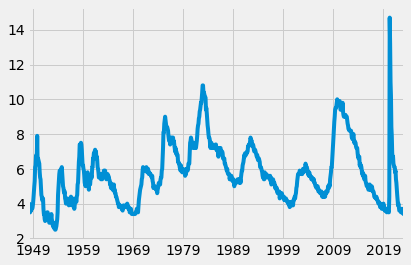

In [13]:
unrate = fred.get_series('UNRATE')

unrate.plot()

In [14]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly')) #filter by monthly data

In [15]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') #We run a query to filter only seasonally adjusted data



In [16]:
#Now we filter on the title using sting filters

In [17]:
unemp_df['title']

series id
UNRATE                                              Unemployment Rate
LNS14000006             Unemployment Rate - Black or African American
U6RATE              Total Unemployed, Plus All Persons Marginally ...
M0892AUSM156SNBR                  Unemployment Rate for United States
CAUR                                  Unemployment Rate in California
                                          ...                        
LNS14100000                       Unemployment Rate Full-Time Workers
CNEWUR               Unemployment Rate in New England Census Division
LNS13023570             New Entrants as a Percent of Total Unemployed
LRUN25TTUSM156S     Unemployment Rate: Aged 25-54: All Persons for...
LNS14000093                            Unemployment Rate - 45-54 Yrs.
Name: title, Length: 164, dtype: object

In [18]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [19]:
unemp_df

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-04-17   2023-04-17   
LNS14000006            LNS14000006     2023-04-17   2023-04-17   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-04-17   2023-04-17   
CAUR                          CAUR     2023-04-17   2023-04-17   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-04-17   2023-04-17   
...                            ...            ...          ...   
CSOUUR                      CSOUUR     2023-04-17   2023-04-17   
LNS14100000            LNS14100000     2023-04-17   2023-04-17   
CNEWUR                      CNEWUR     2023-04-17   2023-04-17   
LRUN25TTUSM156S    LRUN25TTUSM156S     2023-04-17   2023-04-17   
LNS14000093            LNS14000093     2023-04-17   2023-04-17   

                                                              title  \
series id                                                             
UNRATE                                            Unemployment Rate   
LNS14000006           Unemployment Rate - Black or African American   
M0892AUSM156SNBR                Unemployment Rate for United States   
CAUR                                Unemployment Rate in California   
M0892BUSM156SNBR                Unemployment Rate for United States   
...                                                             ...   
CSOUUR                     Unemployment Rate in South Census Region   
LNS14100000                     Unemployment Rate Full-Time Workers   
CNEWUR             Unemployment Rate in New England Census Division   
LRUN25TTUSM156S   Unemployment Rate: Aged 25-54: All Persons for...   
LNS14000093                          Unemployment Rate - 45-54 Yrs.   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-03-01   Monthly               M   
LNS14000006             1972-01-01      2023-03-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
CAUR                    1976-01-01      2023-02-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   
...                            ...             ...       ...             ...   
CSOUUR                  1976-01-01      2023-02-01   Monthly               M   
LNS14100000             1968-01-01      2023-03-01   Monthly               M   
CNEWUR                  1976-01-01      2023-02-01   Monthly               M   
LRUN25TTUSM156S         1960-01-01      2023-01-01   Monthly               M   
LNS14000093             1948-01-01      2023-03-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   
...                   ...         ...                  ...   
CSOUUR            Percent           %  Seasonally Adjusted   
LNS14100000       Percent           %  Seasonally Adjusted   
CNEWUR            Percent           %  Seasonally Adjusted   
LRUN25TTUSM156S   Percent           %  Seasonally Adjusted   
LNS14000093       Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-04-07 07:44:02-05:00   
LNS14000006                             SA  2023-04-07 07:44:12-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   
CAUR                                

In [20]:
#Now we want to go through each of these id's and pull the series data 

In [21]:
all_results = []
for my_id in unemp_df.index:
    results = fred.get_series(my_id)
    results = results.to_frame(name = my_id)
    all_results.append(results)

In [22]:
all_results[4] #The list contains all the dataframes extracted from unemp_df

M0892BUSM156SNBR
1940-01-01             15.53
1940-02-01               NaN
1940-03-01             15.03
1940-04-01             15.82
1940-05-01             15.50
...                      ...
1946-08-01              3.73
1946-09-01              3.97
1946-10-01              4.00
1946-11-01              3.96
1946-12-01              4.16

[84 rows x 1 columns]

In [23]:
#Lets concat all of them together

In [24]:
unemp_results = pd.concat(all_results, axis = 1)

In [25]:
(unemp_results.columns.values)

array(['UNRATE', 'LNS14000006', 'M0892AUSM156SNBR', 'CAUR',
       'M0892BUSM156SNBR', 'LNS14000002', 'NYUR', 'TXUR', 'U2RATE',
       'FLUR', 'LNS14000024', 'LNS14000031', 'LNS14000009', 'LNS14000001',
       'LNS14027660', 'LNS14027662', 'LNS14000003', 'LRUN64TTUSM156S',
       'ALUR', 'MIUR', 'PAUR', 'ILUR', 'OHUR', 'MAUR', 'MNUR', 'NCUR',
       'KYUR', 'VAUR', 'WIUR', 'LNS14032183', 'COUR', 'MOUR', 'GAUR',
       'AZUR', 'NJUR', 'AKUR', 'ORUR', 'TNUR', 'NDUR', 'SCUR', 'WAUR',
       'WVUR', 'INUR', 'IAUR', 'NVUR', 'NMUR', 'LASMT261982000000003',
       'OKUR', 'LNS14027659', 'ARUR', 'UTUR', 'KSUR', 'LAUR', 'PRUR',
       'CTUR', 'MDUR', 'LNS14000018', 'MTUR', 'HIUR', 'MSUR',
       'LNS14000012', 'NEUR', 'SDUR', 'LRUNTTTTUSM156S', 'MEUR', 'DCUR',
       'NHUR', 'WYUR', 'IDUR', 'LNS14024887', 'RIUR', 'LNS14000032',
       'LASMT391746000000003', 'DEUR', 'LRHUTTTTUSM156S', 'LNS14000060',
       'LNS14000028', 'VTUR', 'CMWRUR', 'LNS14000036', 'LNS14027689',
       'CNERUR', 'CWSTUR',

In [26]:
#delete = []
#for names in unemp_states.columns.values:
#    if names[0:3] in ['LNS', 'LRU']:
        
#        delete.append(names)
        
#delete #There are more non-required values here, lets filter more

In [27]:
trash_name = []

for names in unemp_results.columns.values:
    if len(names.strip()) != 4:
        trash_name.append(names)

In [28]:
#unemp_states.columns.values

In [29]:
#We are trying to remove the columns other than the states, which have a code of 4 alphabets

unemp_results = unemp_results.drop(trash_name, axis = 1)

In [30]:
unemp_states = unemp_results.copy()

<AxesSubplot:>

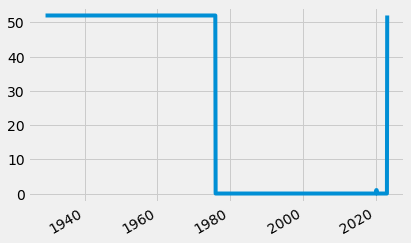

In [31]:
unemp_states.isnull().sum(axis = 1).plot() #This will tell us how many missing values we have wrt the vertical axis or the dates

In [32]:
#unemp_states.dropna(inplace = True)

In [33]:
unemp_states= unemp_states.dropna()

In [42]:
#Plot states unemployment rate

px.line(unemp_states)

## <font color = 'BLUE'> 5. PULL April 2020 unemployment rates</FONT>

# <font color = 'RED'> We need to clean the data to get the state names

In [35]:
#unemp_states.index.tolist()

unemp_df.head()

id realtime_start realtime_end  \
series id                                                        
UNRATE                      UNRATE     2023-04-17   2023-04-17   
LNS14000006            LNS14000006     2023-04-17   2023-04-17   
M0892AUSM156SNBR  M0892AUSM156SNBR     2023-04-17   2023-04-17   
CAUR                          CAUR     2023-04-17   2023-04-17   
M0892BUSM156SNBR  M0892BUSM156SNBR     2023-04-17   2023-04-17   

                                                          title  \
series id                                                         
UNRATE                                        Unemployment Rate   
LNS14000006       Unemployment Rate - Black or African American   
M0892AUSM156SNBR            Unemployment Rate for United States   
CAUR                            Unemployment Rate in California   
M0892BUSM156SNBR            Unemployment Rate for United States   

                 observation_start observation_end frequency frequency_short  \
series id                                                                      
UNRATE                  1948-01-01      2023-03-01   Monthly               M   
LNS14000006             1972-01-01      2023-03-01   Monthly               M   
M0892AUSM156SNBR        1929-04-01      1942-06-01   Monthly               M   
CAUR                    1976-01-01      2023-02-01   Monthly               M   
M0892BUSM156SNBR        1940-01-01      1946-12-01   Monthly               M   

                    units units_short  seasonal_adjustment  \
series id                                                    
UNRATE            Percent           %  Seasonally Adjusted   
LNS14000006       Percent           %  Seasonally Adjusted   
M0892AUSM156SNBR  Percent           %  Seasonally Adjusted   
CAUR              Percent           %  Seasonally Adjusted   
M0892BUSM156SNBR  Percent           %  Seasonally Adjusted   

                 seasonal_adjustment_short               last_updated  \
series id                                                               
UNRATE                                  SA  2023-04-07 07:44:02-05:00   
LNS14000006                             SA  2023-04-07 07:44:12-05:00   
M0892AUSM156SNBR                        SA  2012-08-17 14:26:06-05:00   
CAUR                                    SA  2023-03-27 16:09:02-05:00   
M0892BUSM156SNBR                        SA  2012-08-17 14:29:19-05:00   

                 popularity                                              notes  
series id                                                                       
UNRATE                   94  The unemployment rate represents the number of...  
LNS14000006              67  The series comes from the 'Current Population ...  
M0892AUSM156SNBR         56  Series Is Presented Here As Three Variables--(...  
CAUR                     58                                               None  
M0892BUSM156SNBR         21  Series Is Presented Here As Three Variables--(...

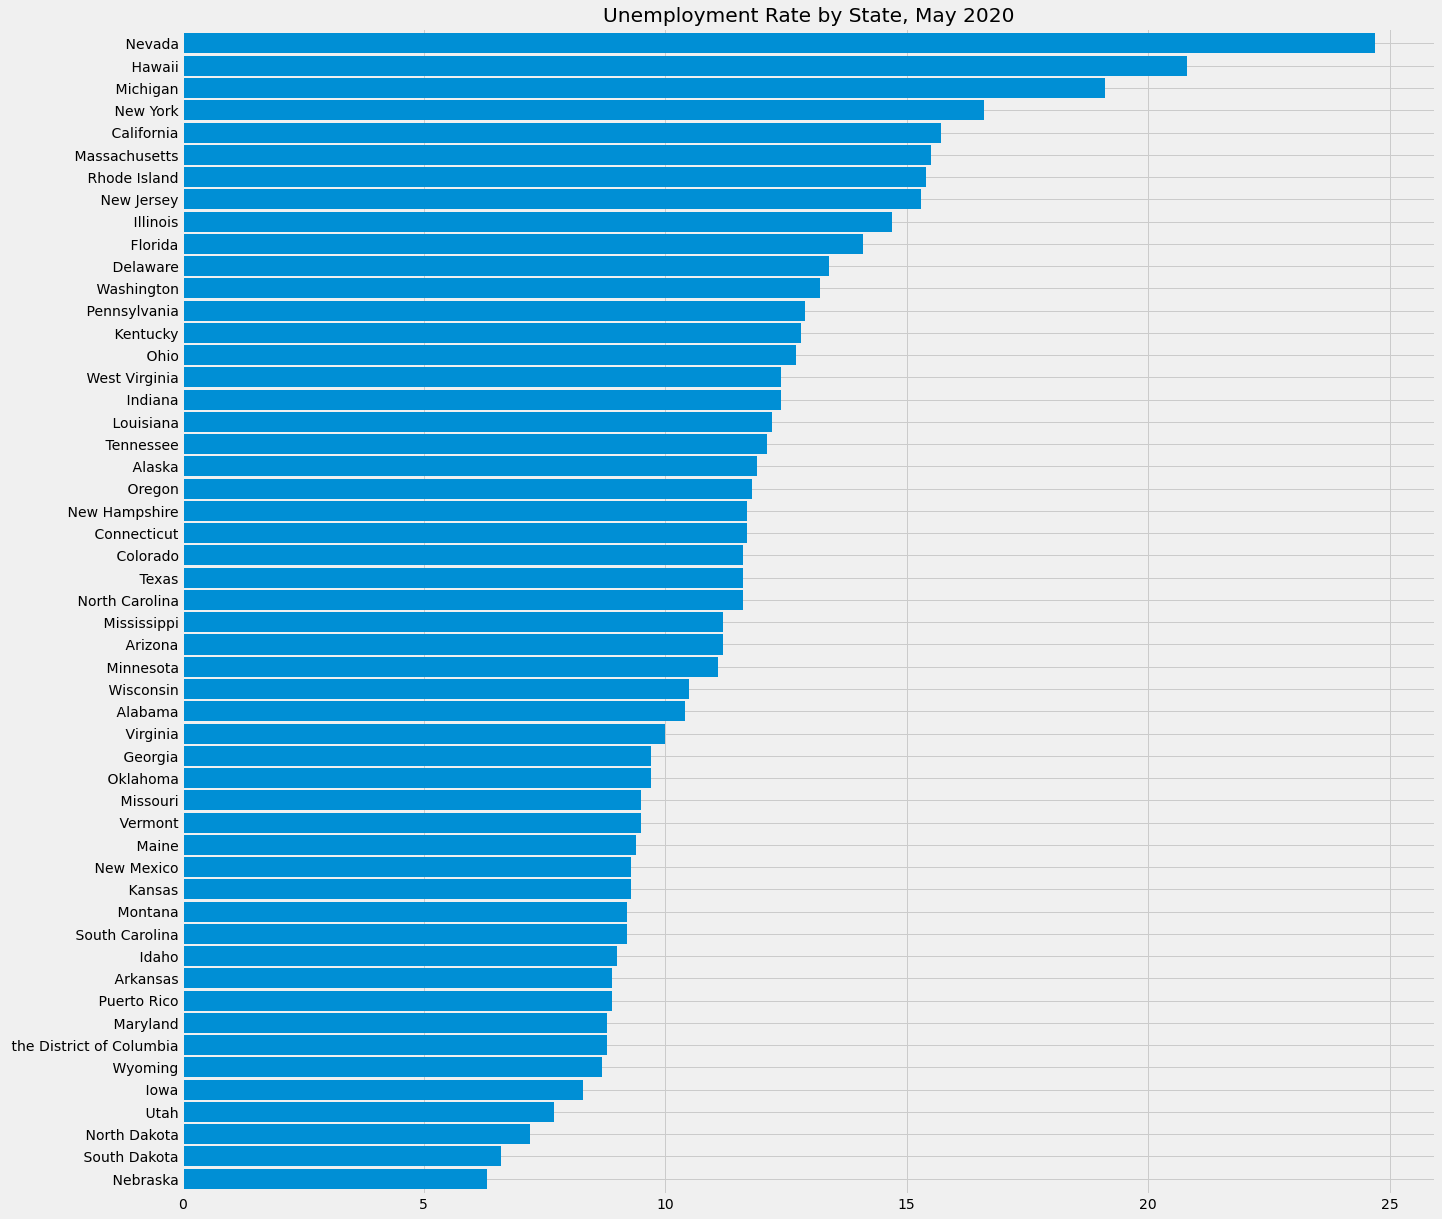

In [46]:
 #T is used to transform the array
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T\
.sort_values('2020-05-01')\
.plot(kind = 'barh', figsize = (20,20), width = 0.9, title = 'Unemployment Rate by State, May 2020')

ax.legend().remove()
plt.show()

In [37]:
pd.set_option('display.max_rows', None)

delete = []
for i in unemp_df.index.tolist():
    if len(i.strip()) != 4:
        delete.append(i)
        
unemp_df['title'] = unemp_df['title'].str.replace('Unemployment Rate in', '')
unemp_df.drop(delete, axis = 0, inplace = True)


In [38]:
#trash = []
#for values in unem_results.index.tolist():
#    if values[0:1] in ['UN', 'L'] and values[0:2] not in ['LO']:
#        trash.append(values)

In [39]:
state_names = unemp_df['title'].to_dict()

#state_names

{'CAUR': ' California',
 'NYUR': ' New York',
 'TXUR': ' Texas',
 'FLUR': ' Florida',
 'ALUR': ' Alabama',
 'MIUR': ' Michigan',
 'PAUR': ' Pennsylvania',
 'ILUR': ' Illinois',
 'OHUR': ' Ohio',
 'MAUR': ' Massachusetts',
 'MNUR': ' Minnesota',
 'NCUR': ' North Carolina',
 'KYUR': ' Kentucky',
 'VAUR': ' Virginia',
 'WIUR': ' Wisconsin',
 'COUR': ' Colorado',
 'MOUR': ' Missouri',
 'GAUR': ' Georgia',
 'AZUR': ' Arizona',
 'NJUR': ' New Jersey',
 'AKUR': ' Alaska',
 'ORUR': ' Oregon',
 'TNUR': ' Tennessee',
 'NDUR': ' North Dakota',
 'SCUR': ' South Carolina',
 'WAUR': ' Washington',
 'WVUR': ' West Virginia',
 'INUR': ' Indiana',
 'IAUR': ' Iowa',
 'NVUR': ' Nevada',
 'NMUR': ' New Mexico',
 'OKUR': ' Oklahoma',
 'ARUR': ' Arkansas',
 'UTUR': ' Utah',
 'KSUR': ' Kansas',
 'LAUR': ' Louisiana',
 'PRUR': ' Puerto Rico',
 'CTUR': ' Connecticut',
 'MDUR': ' Maryland',
 'MTUR': ' Montana',
 'HIUR': ' Hawaii',
 'MSUR': ' Mississippi',
 'NEUR': ' Nebraska',
 'SDUR': ' South Dakota',
 'MEUR':

In [40]:
unemp_states.columns = [state_names[c] for c in unemp_states.columns]

In [41]:
unemp_states

California   New York   Texas   Florida   Alabama   Michigan  \
1976-01-01          9.2       10.3     5.8       9.7       6.6        9.9   
1976-02-01          9.2       10.3     5.8       9.7       6.6        9.9   
1976-03-01          9.1       10.2     5.9       9.6       6.6        9.9   
1976-04-01          9.1       10.2     5.9       9.5       6.5        9.8   
1976-05-01          9.0       10.1     5.9       9.3       6.4        9.6   
1976-06-01          9.0       10.2     5.9       9.2       6.5        9.4   
1976-07-01          9.0       10.2     5.9       9.1       6.6        9.2   
1976-08-01          9.1       10.2     5.8       9.1       6.7        9.1   
1976-09-01          9.2       10.2     5.7       9.1       6.8        9.0   
1976-10-01          9.3       10.2     5.7       9.1       6.9        9.0   
1976-11-01          9.3       10.2     5.7       9.1       7.0        9.0   
1976-12-01          9.3       10.2     5.8       9.1       7.2        9.0   
1977-01-01          9.2       10.1     5.8       9.0       7.3        8.9   
1977-02-01          9.1       10.0     5.8       9.0       7.4        8.7   
1977-03-01          8.9        9.8     5.7       8.9       7.5        8.6   
1977-04-01          8.7        9.6     5.5       8.7       7.5        8.4   
1977-05-01          8.6        9.3     5.4       8.6       7.5        8.3   
1977-06-01          8.4        9.1     5.3       8.4       7.4        8.2   
1977-07-01          8.3        9.0     5.2       8.2       7.3        8.2   
1977-08-01          8.1        8.8     5.3       8.1       7.1        8.2   
1977-09-01          8.0        8.8     5.3       7.9       6.9        8.1   
1977-10-01          7.9        8.6     5.3       7.7       6.8        7.9   
1977-11-01          7.8        8.5     5.3       7.5       6.6        7.7   
1977-12-01          7.7        8.4     5.3       7.3       6.5        7.5   
1978-01-01          7.6        8.2     5.2       7.1       6.4        7.3   
1978-02-01          7.5        8.1     5.1       7.0       6.3        7.1   
1978-03-01          7.5        8.0     5.0       6.9       6.3        7.0   
1978-04-01          7.4        7.9     4.9       6.8       6.2        6.9   
1978-05-01          7.3        7.8     4.9       6.8       6.2        6.9   
1978-06-01          7.2        7.8     4.8       6.8       6.2        6.9   
1978-07-01          7.1        7.7     4.8       6.7       6.3        6.9   
1978-08-01          7.0        7.6     4.8       6.7       6.4        7.0   
1978-09-01          6.9        7.5     4.8       6.6       6.5        7.0   
1978-10-01          6.8        7.4     4.8       6.6       6.6        7.1   
1978-11-01          6.7        7.3     4.7       6.6       6.7        7.1   
1978-12-01          6.6        7.2     4.6       6.5       6.8        7.2   
1979-01-01          6.5        7.2     4.5       6.5       6.9        7.3   
1979-02-01          6.4        7.1     4.4       6.4       7.0        7.3   
1979-03-01          6.3        7.0     4.4       6.3       7.0        7.3   
1979-04-01          6.2        7.0     4.4       6.2       7.1        7.3   
1979-05-01          6.2        7.0     4.4       6.0       7.2        7.4   
1979-06-01          6.1        7.0     4.4       6.0       7.2        7.5   
1979-07-01          6.1        7.1     4.4       5.9       7.3        7.7   
1979-08-01          6.2        7.1     4.4       5.8       7.3        7.9   
1979-09-01          6.2        7.2     4.4       5.8       7.4        8.2   
1979-10-01          6.2        7.2     4.4       5.7       7.4        8.5   
1979-11-01          6.1        7.2     4.4       5.7       7.4        8.8   
1979-12-01          6.1        7.1     4.5       5.6       7.5        9.2   
1980-01-01          6.2        7.1     4.7       5.6       7.6        9.7   
1980-02-01          6.3        7.1     4.9       5.6       7.7       10.4   
1980-03-01          6.5        7.2     5.1       5.7       8.0       11.2   
1980-04-0

# Pull participation rate

In [51]:
part_df = fred.search('participation rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


In [52]:
part_df.shape

(109, 15)

In [55]:
x = []
for i in part_df.index.tolist():
    if len(i.strip()) != 7:
        x.append(i)

part_df.drop(x, axis= 0, inplace = True)


part_df['title'].str.replace('Labor Force Participation Rate for ', '')

series id
CIVPART    Labor Force Participation Rate
LBSSA06                        California
LBSSA12                           Florida
LBSSA55                         Wisconsin
LBSSA01                           Alabama
LBSSA27                         Minnesota
LBSSA36                          New York
LBSSA08                          Colorado
LBSSA26                          Michigan
LBSSA48                             Texas
LBSSA39                              Ohio
LBSSA21                          Kentucky
LBSSA13                           Georgia
LBSSA54                     West Virginia
LBSSA23                             Maine
LBSSA49                              Utah
LBSSA17                          Illinois
LBSSA47                         Tennessee
LBSSA42                      Pennsylvania
LBSSA37                    North Carolina
LBSSA19                              Iowa
LBSSA18                           Indiana
LBSSA51                          Virginia
LBSSA28                 

In [56]:
state_names = part_df['title'].str.replace('Labor Force Participation Rate for ', '').drop('CIVPART').to_dict()

In [65]:
all_results = []
for my_id in part_df.index:
    results = fred.get_series(my_id)
    results = results.to_frame(name = my_id)
    all_results.append(results)
    
part_states = pd.concat(all_results, axis = 1)

part_states.drop('CIVPART', inplace = True, axis = 1)

In [66]:
part_states.columns = [state_names[c] for c in part_states.columns]

In [72]:
part_states.dropna(inplace = True)

part_states.shape

(566, 51)

# <font color = RED> Plot Unemployment vs Participation <font>

In [108]:
#Reset the column names, delete the spaces

unemp_states= unemp_states.rename(columns = lambda x: x.strip())
unemp_states.columns.values

unemp_states.rename(columns={'the District of Columbia':'District of Columbia'}, inplace = True)

unemp_states.columns

Index(['California', 'New York', 'Texas', 'Florida', 'Alabama', 'Michigan',
       'Pennsylvania', 'Illinois', 'Ohio', 'Massachusetts', 'Minnesota',
       'North Carolina', 'Kentucky', 'Virginia', 'Wisconsin', 'Colorado',
       'Missouri', 'Georgia', 'Arizona', 'New Jersey', 'Alaska', 'Oregon',
       'Tennessee', 'North Dakota', 'South Carolina', 'Washington',
       'West Virginia', 'Indiana', 'Iowa', 'Nevada', 'New Mexico', 'Oklahoma',
       'Arkansas', 'Utah', 'Kansas', 'Louisiana', 'Puerto Rico', 'Connecticut',
       'Maryland', 'Montana', 'Hawaii', 'Mississippi', 'Nebraska',
       'South Dakota', 'Maine', 'District of Columbia', 'New Hampshire',
       'Wyoming', 'Idaho', 'Rhode Island', 'Delaware', 'Vermont'],
      dtype='object')

In [109]:
part_states.columns.values

array(['California', 'Florida', 'Wisconsin', 'Alabama', 'Minnesota',
       'New York', 'Colorado', 'Michigan', 'Texas', 'Ohio', 'Kentucky',
       'Georgia', 'West Virginia', 'Maine', 'Utah', 'Illinois',
       'Tennessee', 'Pennsylvania', 'North Carolina', 'Iowa', 'Indiana',
       'Virginia', 'Mississippi', 'Alaska', 'Maryland', 'Massachusetts',
       'New Mexico', 'South Carolina', 'Washington', 'Connecticut',
       'Nebraska', 'Arizona', 'New Jersey', 'Louisiana', 'Hawaii',
       'Oklahoma', 'Montana', 'Arkansas', 'Missouri', 'Oregon', 'Kansas',
       'New Hampshire', 'Vermont', 'Nevada', 'Idaho', 'North Dakota',
       'South Dakota', 'Rhode Island', 'Delaware', 'Wyoming',
       'District Of Columbia'], dtype=object)

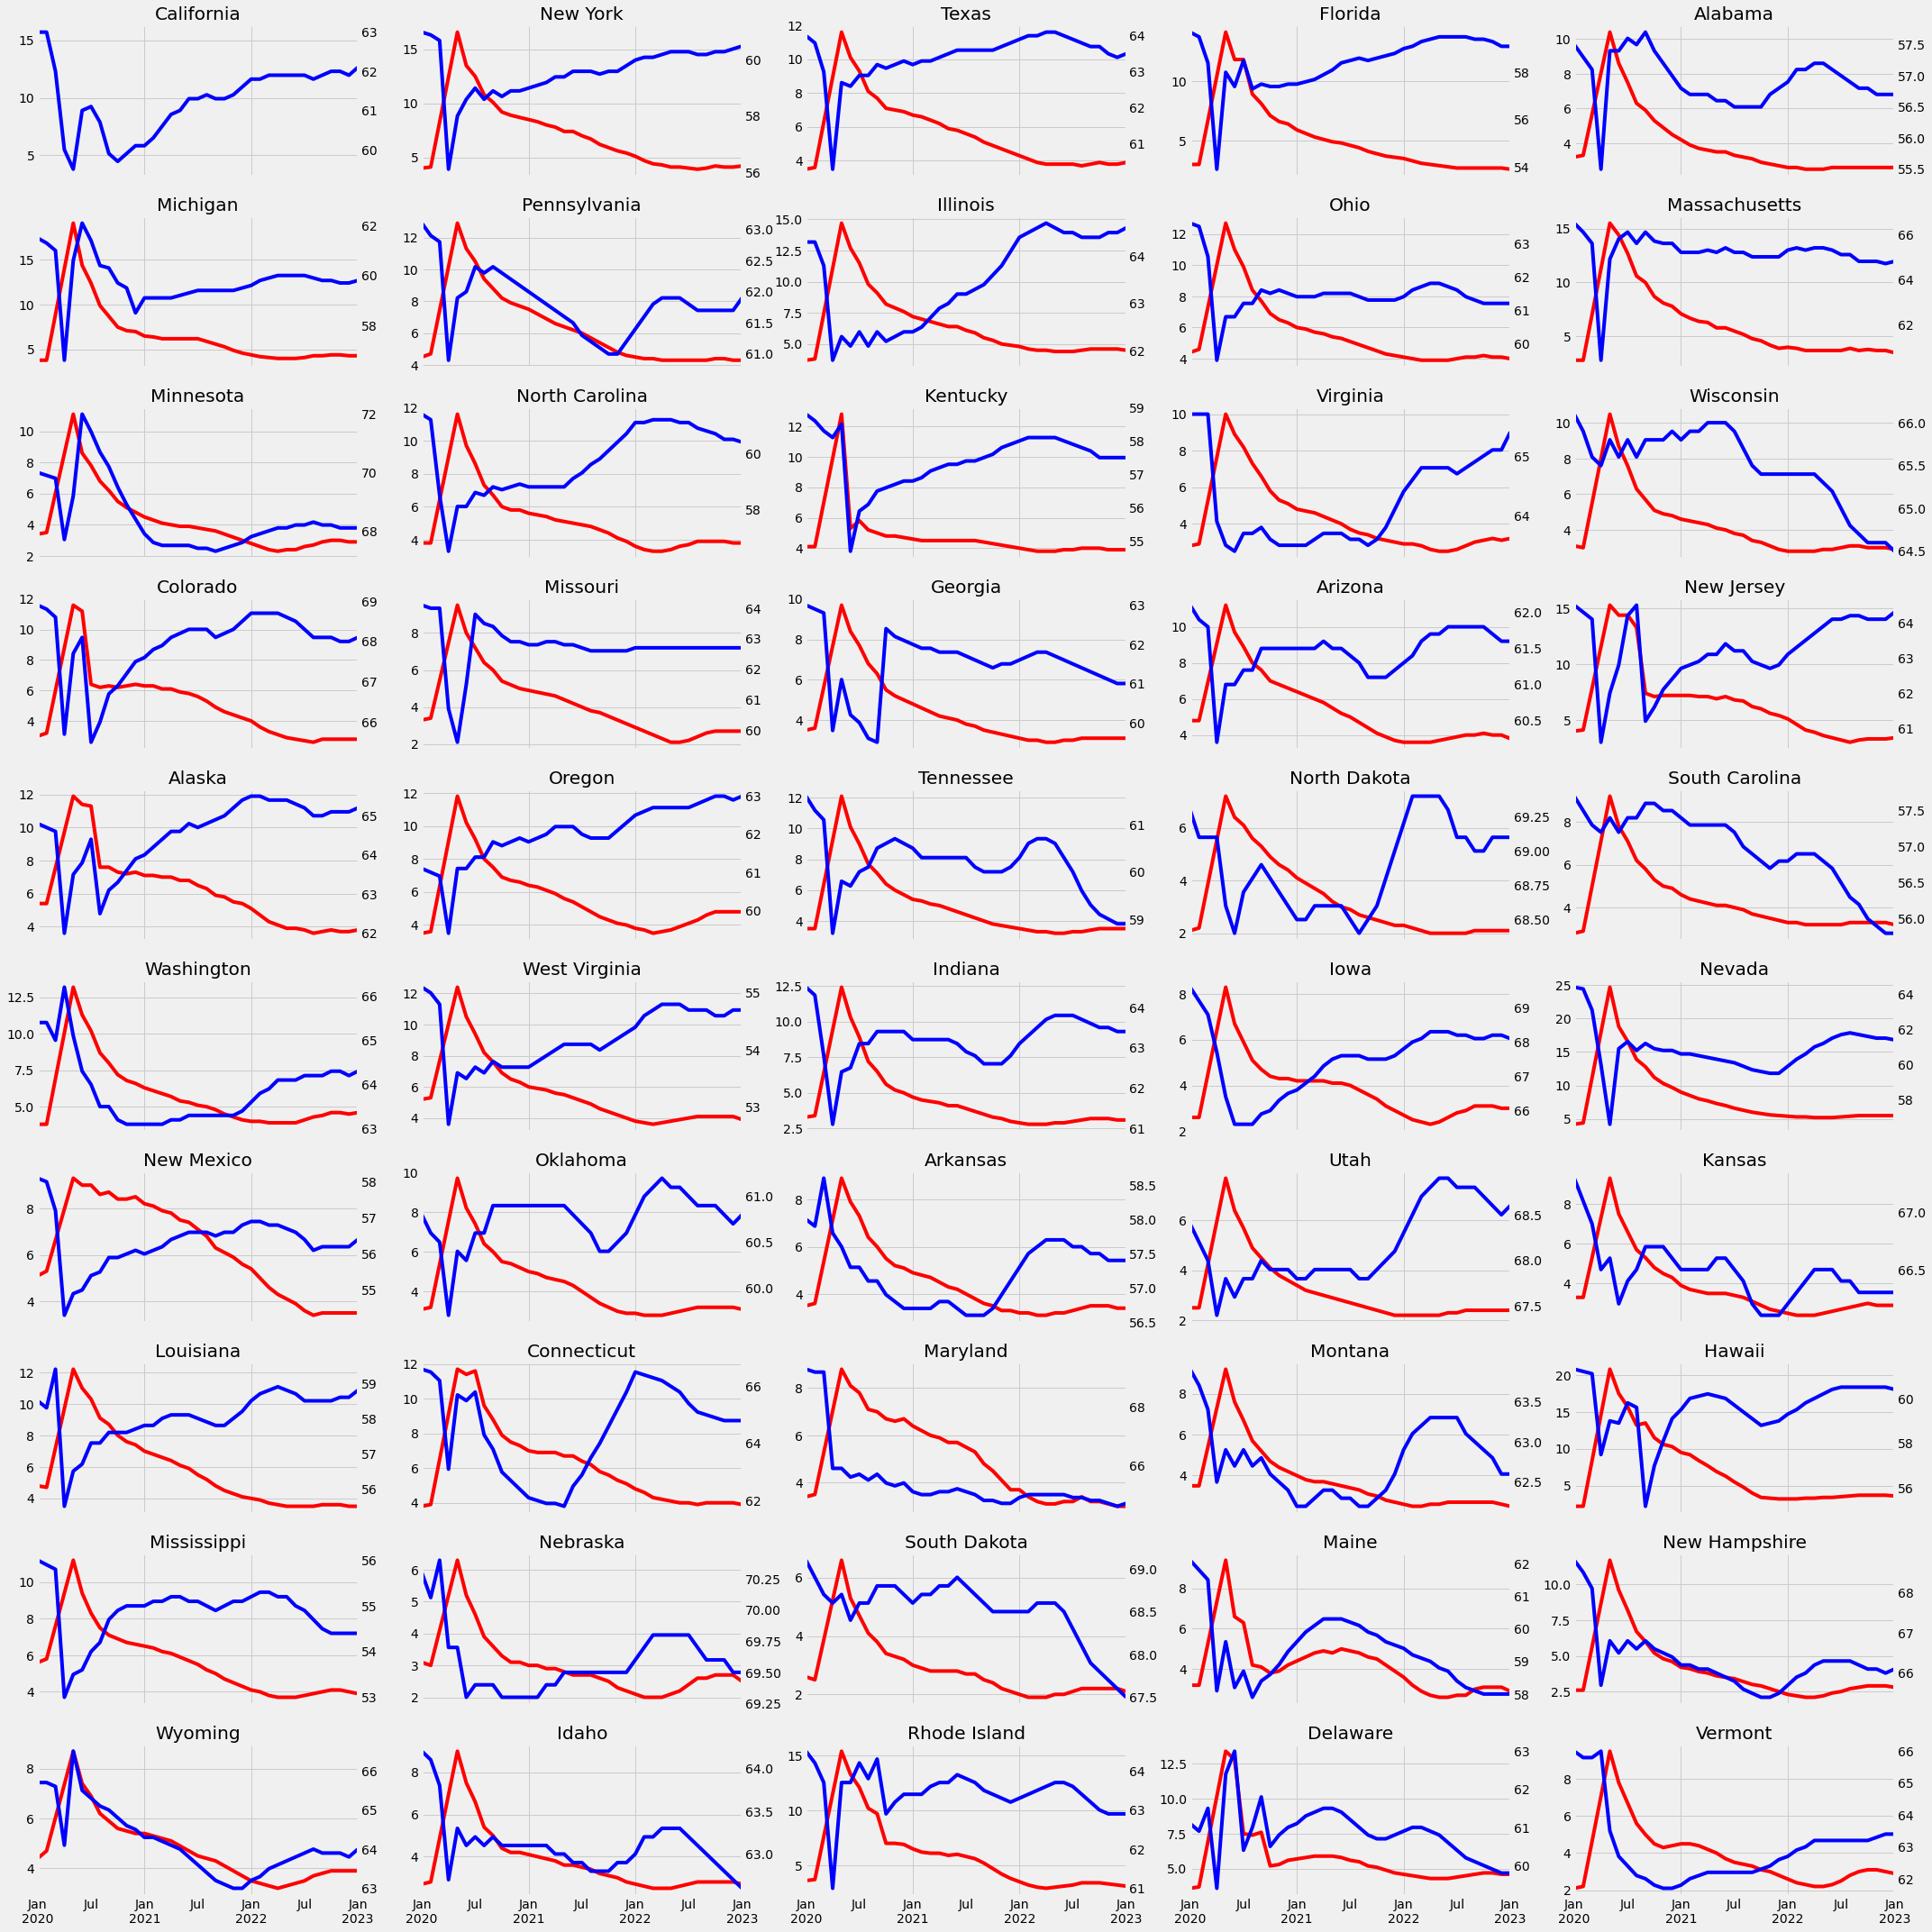

In [112]:
fig, axs = plt.subplots(10,5, figsize = (30,30), sharex = True )
axs= axs.flatten()

i = 0

for states in unemp_states.columns:
    if states in ['District of Columbia', 'Puerto Rico']:
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index <=2023')[states]\
    .plot(ax = axs[i], label = 'Unemployment', color = "red")
    part_states.query('index >= 2020 and index <=2023')[states]\
    .plot(ax = ax2, label = 'Employment Participation', color = "blue")
    ax2.grid(False)
    axs[i].set_title(states)
    i+=1
plt.tight_layout()
plt.show()